# Attack on Titan Metin Madenciliği

#### * Veri setimiz ve gerekli kutuphaneler;

Metin madenciliğine geçmeden önce, gerekli python kitaplıklarını içe aktaralım ve veri setimize bir göz atalım: _TV anime serisinin ilk sezonunun altyazı dosyaları: 'Shingeki no Kyojin (Attack on Titan)' İngilizce dilinde_

In [1]:
# Gerekli olabilecek kutuphaneler
import pandas as pd
import re
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from PIL import Image

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ahmet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
# Aot alt yazılarını okuma

with open('Desktop/That day.txt') as f:
    subtitles = f.read().splitlines()

In [3]:
# alt yazı sayısı
print(len(subtitles))

# ilk 5 alt yazı
subtitles[0:5]

8944


['That day',
 'the terror of being ruled by them.',
 'The humiliation of being kept in a cage.',
 'Prepare for combat!',
 'We have one target...']

In [4]:
def cleantext(text):
    text = " " + text + " "
    text = re.sub('', '', text) # parantez içindeki metni kaldırma
    text = re.sub('\w*\d\w*', '', text) # sayıları kaldırma
    text = re.sub('\s+', ' ', text) # 1'den fazla boslugu sadce 1 bosluk yapmak icin
    text = re.sub('\n', ' ', text) # yeni bir satır geldiyse onu boşluk yapmak icin
    text = re.sub('\"+', '', text) # herhangi bir alintiyi kaldirmak icin
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # Tüm noktalama isaretlerini silmek icin
    text = re.sub(r'[^\w\s]', '',text) # Diger noktalam isaretleri icin
    
    return text

# metni temizleme
subtitles_clean = [cleantext(x) for x in subtitles]

# Temizlenmis altyazı
subtitles_clean[0:5]


  

[' That day ',
 ' the terror of being ruled by them ',
 ' The humiliation of being kept in a cage ',
 ' Prepare for combat ',
 ' We have one target ']

In [5]:
# kelime sayisi
kelime_sayisi = [len(str(x).split()) for x in subtitles_clean]
print(kelime_sayisi[0:5])

# toplam kelime sayisi
print(sum(kelime_sayisi))

[2, 7, 8, 3, 4]
41670


In [6]:
# karakter sayisi
karakter_sayisi = [len(str(x)) for x in subtitles_clean]
print(karakter_sayisi[0:5])

# toplam karakter saysisi
print(sum(karakter_sayisi))

[10, 35, 41, 20, 20]
225388


#### 1. sezonda en cok gorunen karakterler

Oncelikle ana karakterleri elle manuel olarak girmemiz gerekiyor;

In [7]:
# Karakter listesi
karakterler = ["Mikasa",  "Eren",  "Levi",  "Armin", "Hanji", "Connie", "Sasha", "Erwin", "Reiner", "Annie", "Marco", "Jean",
               "Bertolt", "Nile","Shadis", "Armin", "Riko", "Petra","Pixis", "Hitch", "Hannes", "Grisha", "Karla"]

In [8]:
# karaktere gore alt yazi
subtitles_filts = []
for y in karakterler:
    subtitles_filt = []
    for x in subtitles_clean:
        if y in x:
            subtitles_filt.append(x)
    subtitles_filts.append(subtitles_filt)

In [9]:
# karaktere gore alt yazi saysisi
number_sub = []
for i in subtitles_filts:
    number_sub.append(len(i))

print(number_sub)

[83, 362, 39, 75, 10, 4, 9, 46, 12, 82, 17, 34, 2, 5, 1, 75, 4, 9, 13, 1, 5, 1, 2]


data frame olusturalim


In [10]:
# data frame
characters_subs = pd.DataFrame({'karakter': karakterler  ,'alt yazi sayisi': number_sub})
characters_subs = characters_subs.sort_values(by='alt yazi sayisi', ascending=False)

<AxesSubplot: xlabel='alt yazi sayisi', ylabel='karakter'>

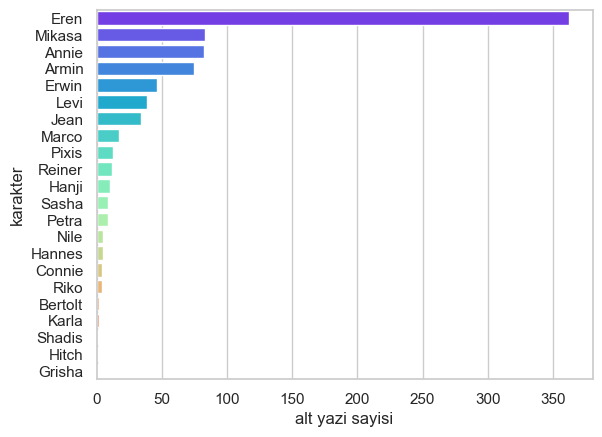

In [24]:
import seaborn as sbn
sbn.barplot(x="alt yazi sayisi", y="karakter", palette = "rainbow", data = characters_subs)

Seride en cok adi gecen karakterin ana karakterimiz olan Eren Yeager olduğunu gözlemleyebiliyoruz.

### En çok kullanılan kelimeler nelerdir?

İlk önce 'I', 'am', vb. gibi alakasız kelimeleri çıkarmalıyız. 

In [25]:
# stopwords kutuphanesini import edelim
import gensim
from gensim.parsing.preprocessing import remove_stopwords, STOPWORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import nltk
from nltk.corpus import stopwords

# import stopwords
sw_nltk = stopwords.words('english')
STOPWORDS = [x for x in STOPWORDS]
ENGLISH_STOP_WORDS = [x for x in ENGLISH_STOP_WORDS]

# final stopwords listemiz
STOPWORDS.extend(ENGLISH_STOP_WORDS)
STOPWORDS.extend(sw_nltk)
STOPWORDS.extend(['dont', 'thats', 'hes', 'didnt','theres','theyre','youre','isnt','wont','whats','huh', 'I', 'In', 'What', 'You', 'Dont',
                  'The', 'No', 'Of', 'Whats', 'Its','na','Your','That','Then',
                  'doesnt','youll','okay','hey','oh','im','x','Im','Thats','Hes','Ive','Theres','Youre','Yes','Yeah','let','Huh','Oh'])

C:\Users\Ahmet\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [27]:
# stopwordleri cıkaralım
kelimeler = ' '.join( [x for x in subtitles_clean])
tokens = word_tokenize(kelimeler)
tokens_without_sw = [word for word in tokens if not word in STOPWORDS]

# tokenların sayısı
print("Stopwords çıkmadan once: ", len(tokens))
print("Stopwords çıktıktan sonra: ", len(tokens_without_sw))

Stopwords çıkmadan once:  41680
Stopwords çıktıktan sonra:  20538



### En çok kullanılan kelimeleri wordcloud formatında gormek istersek.

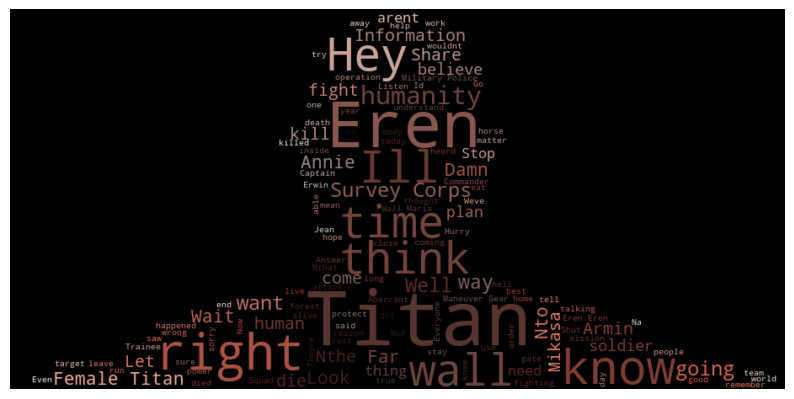

In [76]:
kelimeler = ' '.join( [x for x in tokens_without_sw])
mask = np.array(Image.open('Desktop/colossal.jpg'))
mask_colors = ImageColorGenerator(mask)
wc = WordCloud(background_color="black",
               mask = mask,
               max_words=130, max_font_size=90,
               random_state=42,
               color_func=mask_colors)
wc.generate(kelimeler)
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

In [100]:
kelimeler_2 = kelimeler.split()
kelimeler_df = pd.DataFrame(kelimeler_2)
frekanslar = kelimeler_df[0].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
frekanslar

,index,0
0,day,23.0
1,terror,6.0
2,ruled,6.0
3,humiliation,5.0
4,kept,11.0
...,...,...
4043,expected,1.0
4044,humor,1.0
4045,warrior,1.0
4046,funny,1.0


#### Seride en çok tekrar eden 15 kelime

In [177]:
from collections import Counter
kelime_sayisi = Counter(kelimeler_2)

In [ ]:
words = [item[0] for item in kelime_sayisi.most_common(15)]
freqs = [item[1] for item in kelime_sayisi.most_common(15)]

<AxesSubplot: >

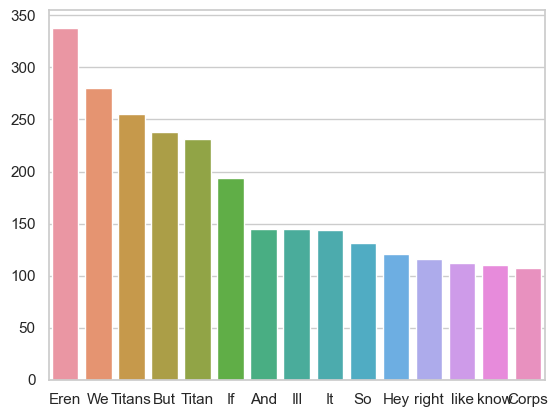

In [176]:
sbn.barplot(x=words, y=freqs)